# Astropy I: Introduction

So far we have looked at some interesting features that Python and some of its packages have to offer. We had a glimpse of the power of NumPy and Matplotlib. These are perhaps very versatile packages and find use at a lot of places. 

However, the scope for astronomical data analysis is very vast and is only getting wider with time. Since Python is the  primary programming language that many astronomers prefer, some went on to make packages relevant to astronomy. What if all such packages could be found together under one umbrella? Well, the **Astropy Project** is the answer.

[Astropy](https://www.astropy.org/) is an open-source and community-developed Python package, with the first public version released in [2013](https://www.aanda.org/articles/aa/full_html/2013/10/aa22068-13/aa22068-13.html).

The purpose of Astropy is to provide core astronomy-related functionality to the community, including support for domain-specific file formats such as flexible image transport system (FITS) files, common ASCII table formats, unit and physical quantity conversions, physical constants specific to astronomy, celestial coordinate and time transformations, world coordinate system (WCS) support, generalized containers for representing gridded as well as tabular data, and a framework for cosmological transformations and conversions.

To know more about Astropy, you can check out the latest documentation [here](https://docs.astropy.org/en/stable/).

## Introduction to FITS files

The most popular file format used in astronomy, Flexible Image Transport System ([FITS](https://fits.gsfc.nasa.gov/fits_documentation.html)), is a digital file format meant for storage of data: formatted as multi-dimensional arrays (2D for the example we'll look at), or tables. Astropy provides the `astropy.io.fits` package to deal with FITS files efficiently and access information with ease.

FITS files can also be used to store non-image data like (and this is foreshadowing) light curves or spectra in a table format. This particular application, we will see in the Scipy II tutorial. For the time being, we will concern ourselves only with image data.

Let us begin with first importing this package.

In [1]:
from astropy.io import fits

Let us import some tools for plotting as well, since we would also like to look at the pretty picture hidden in the huge array of numbers.

In [57]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.stats import sigma_clipped_stats

# This magic function has a lot more functionality than inline. You will see how much later
%matplotlib notebook

Note that we have also imported `astropy.stats.sigma_clipped_stats`. This is a function that implements sigma clipping. It calculates the mean, median and standard deviation of the given data, then clips all the values beyond the mean $\pm$ `sigma`times standard deviation, and then re-calculates the mean, median and standard deviation. This process is repeated until either the statistics converge, or for `iters` number of iterations. (`sigma` and `iters` are arguments to be passed to the function). <br>
This is useful to find the statistics excluding any outliers that might exist. 

Let us now open the FITS file given.

In [58]:
m3_fits = fits.open('Messier3.fits')
m3_fits.info()

Filename: Messier3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     115   (4096, 4108)   int16 (rescales to uint16)   


We have now read the given FITS file into our variable. `m3_fits.info()` displays a summary of the FITS file in the form of a list of an [HDUList](https://docs.astropy.org/en/stable/io/fits/api/hdulists.html#astropy.io.fits.HDUList). An HDU (Header/Data Unit) of the FITS file can be thought of as similar to spreadsheets in an Excel sheet. They are segments of the FITS file which may contain independent information. Each HDU has a Header and Data components. We will see more about these below.

Since we have only one [HDU object](https://docs.astropy.org/en/stable/io/fits/api/hdus.html), we shall index our variable as `m3_fits[0]` to access the data it contains. If we had more HDUs, we could have accessed them with higher indices. 

In [59]:
m3_header = m3_fits[0].header
m3_header

SIMPLE  =                    T / conform to FITS standard                       
BITPIX  =                   16 / unsigned short data                            
NAXIS   =                    2 / number of axes                                 
NAXIS1  =                 4096 / length of data axis                            
NAXIS2  =                 4108 / length of data axis                            
EXTEND  =                    T / this is FITS with extensions                   
HISTORY Created with RTS2 version 0.9.5 build on Apr 11 2020 00:33:30.          
CTIME   =           1586578832 / exposure start (seconds since 1.1.1970)        
USEC    =                  515 / exposure start micro seconds                   
JD      =     2458950.68092013 / Modified Julian Date                           
DATE-OBS= '2020-04-11T04:20:32.000' / start of exposure                         
EXPOSURE=                  30. / exposure length in seconds                     
EXPTIME =                  3

The header of this FITS file contains a lot of information about the when and where and how of the image. The image we are using was taken by the [GROWTH-India Telescope](https://sites.google.com/view/growthindia/) located at Hanle in Ladakh. The header tells us all the necessary details about the telescope, the camera, the target being observed, the observing conditions and so on.

We can read out individual keyword values from the header in the following ways.

In [60]:
m3_header['DATE-OBS']

'2020-04-11T04:20:32.000'

In [61]:
m3_header[3]

4096

It is also possible to update values in the header file if necessary.

In [62]:
m3_header['DATE-OBS']='April 10th, 2020'
m3_header

SIMPLE  =                    T / conform to FITS standard                       
BITPIX  =                   16 / unsigned short data                            
NAXIS   =                    2 / number of axes                                 
NAXIS1  =                 4096 / length of data axis                            
NAXIS2  =                 4108 / length of data axis                            
EXTEND  =                    T / this is FITS with extensions                   
HISTORY Created with RTS2 version 0.9.5 build on Apr 11 2020 00:33:30.          
CTIME   =           1586578832 / exposure start (seconds since 1.1.1970)        
USEC    =                  515 / exposure start micro seconds                   
JD      =     2458950.68092013 / Modified Julian Date                           
DATE-OBS= 'April 10th, 2020'   / start of exposure                              
EXPOSURE=                  30. / exposure length in seconds                     
EXPTIME =                  3

The header keywords often have comments against them to give a short explanation.

In [63]:
m3_header.comments['EXPOSURE']

'exposure length in seconds'

Let us now turn to the most important part of a FITS file - the data it stores. In the case of our example, this data is a 2D array of photon counts detected by the [CCD camera](https://en.wikipedia.org/wiki/Charge-coupled_device#Use_in_astronomy) which we shall soon interpret as a beautiful image of Messier 3.

In [64]:
m3_data = m3_fits[0].data

In [65]:
print(m3_data.shape, m3_data.dtype.name)

(4108, 4096) uint16


We can check the size of the array as well as the type of data it stores. 

We can also view parts of the array and update it with new values (Although, why would one want to do that?)

In [66]:
print(m3_data[2020:2025,2010:2015])

[[1450 1473 1413 1360 1280]
 [1397 1406 1453 1486 1383]
 [1328 1489 1553 1635 1546]
 [1442 1535 1661 1743 1548]
 [1418 1579 1702 1788 1575]]


We have finally reached the point where we shall plot our Messier object.

<IPython.core.display.Javascript object>


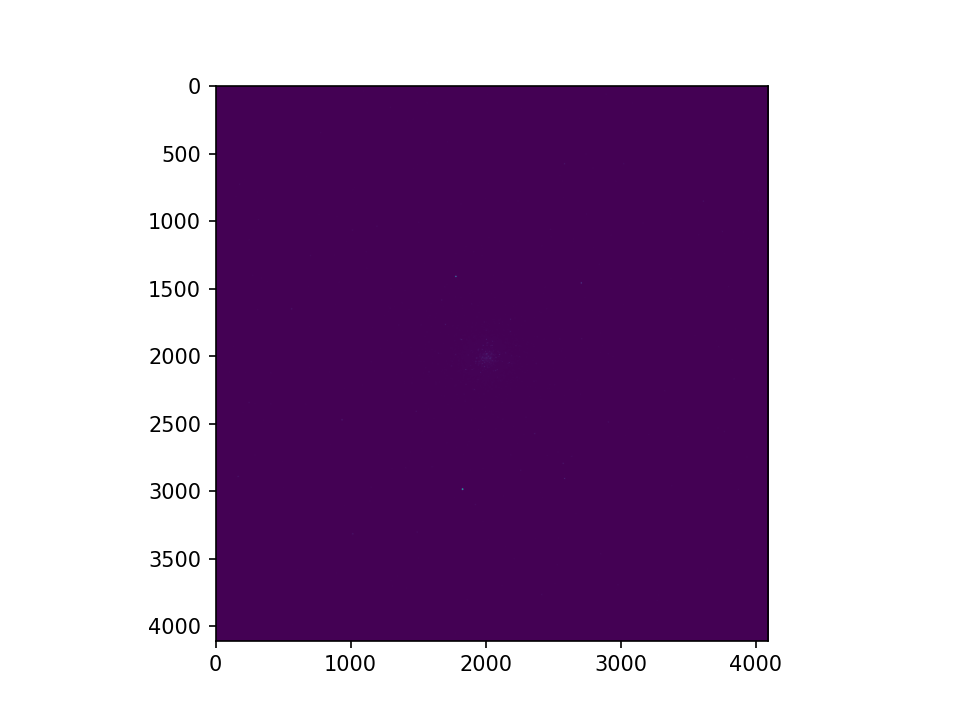

In [67]:
plt.imshow(m3_data)

However, an image taken using a CCD camera often has some saturated pixels, often due to [cosmic rays](https://en.wikipedia.org/wiki/Cosmic_ray), you can see a few in the image above. This ruins the image, because of the vast difference in contrast. 

To eliminate the outliers that result due to saturated pixels, we use the `sigma_clipped_stats` to compute stats for our data and use them in our plotting function as the colorbar limits.

In [68]:
mean, median, std = sigma_clipped_stats(m3_data)

<IPython.core.display.Javascript object>


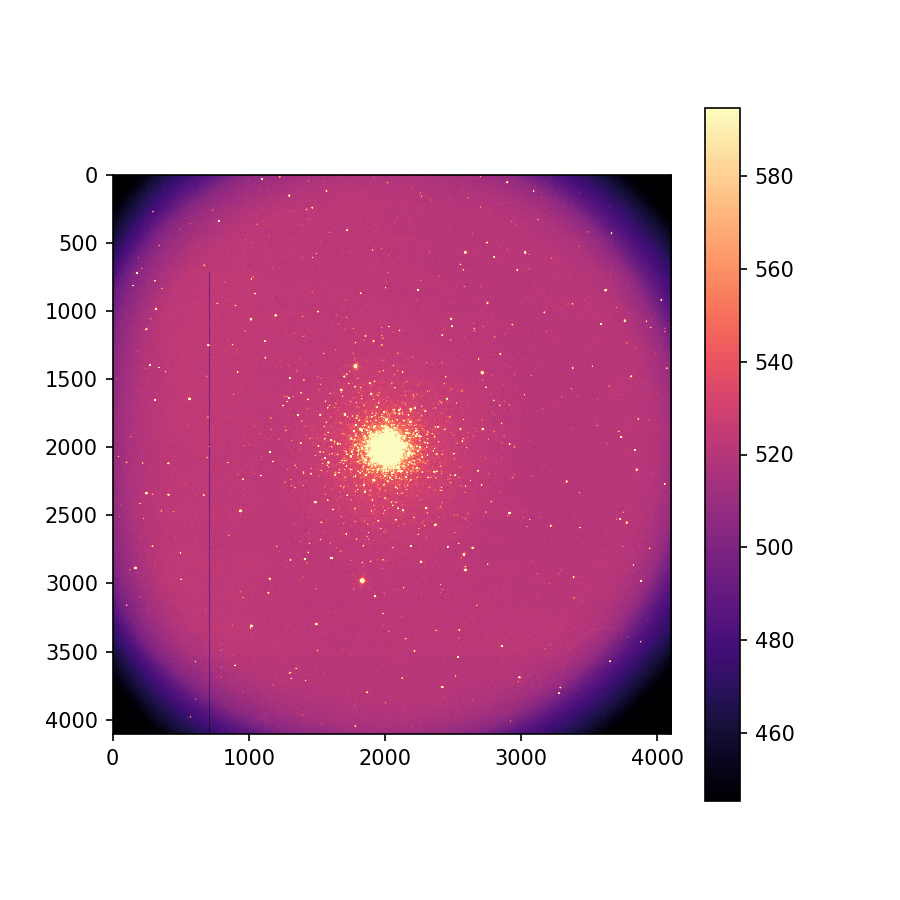

In [69]:
plt.figure(figsize=(6,6))

# set the scale of the image based on its statistics
# any pixel above vmax will show up with the same color as vmax. And vice-versa for vmin
plt.imshow(m3_data, vmin = median - 5*std, vmax = median + 5*std, cmap='magma')
plt.colorbar()

Note that we have used the value 'gray' for the `cmap` parameter. You can try out other colormaps given [here](https://matplotlib.org/tutorials/colors/colormaps.html).

Try holding your cursor above the picture. You should be able to see the pixel number and value, which will be useful when you want to find particular regions (as you will require in the assignment)

We can also plot only the desired part of the image by appropriate indexing. For this image, since the Messier 3 is located at the centre of the image, we can make a plot of the central 2000x2000 part of the image.

<IPython.core.display.Javascript object>


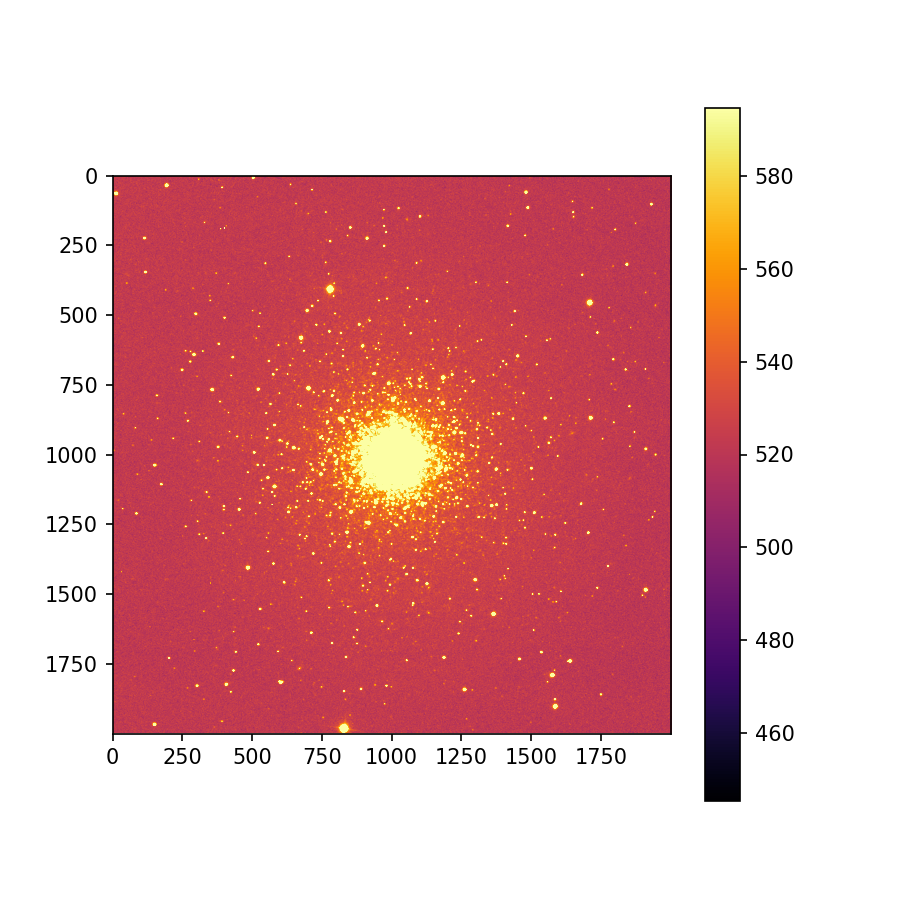

In [70]:
plt.figure(figsize=(6,6))

plt.imshow(m3_data[1000:3000,1000:3000], vmin = median - 5*std, vmax = median + 5*std, cmap='inferno')
plt.colorbar()

## CCD Cameras in Astronomy

The FITS image we have used above was taken by the GROWTH-India Telescope, which uses a CCD camera. The dimensions of this camera are 4108x4096, indicating the number of individual pixels that collect data i.e. photons. CCDs are particularly popular because of their linear response to light, meaning that the reading of each pixel is essentially linearly proportional to the number of photons falling on this pixel. Hence, the array of numbers that is stored in a FITS file is basically a map of how many photons are incident on each pixel. 

Ideally, the dark sky should give zero counts everywhere except where stars are present. However, we shall see in a the tutorial on **Image Reduction** that there are numerous sources of imperfections that make the analysis challenging. For now, let us accept those imperfections and try quantifying them. (We will also talk more about CCD cameras there as well)

If you check the plots above and look at the regions which do not have any stars, you'll see that the color doesn't correspond to the zero value on the adjacent colorbar. This finite count which is more or less uniform everywhere is known as the background count. The sources for this count shall be discussed in a later tutorial.

### Your assignment...
...should you choose to accept it will be the following:

1. To find out a reasonable estimate for the background count in the given image. <br>
You can use the features of the interactive plot in the matplotlib notebook environment, and find a region with low star counts. Try to do this for many regions, and find out if the values change considerably. 
2. Estimate the distribution of the background counts in the given image.<br>
As you can imagine, the background rates are more or less random. However, they do follow some probability distribution. Your task is to numerically plot this distribution. Try to use only the parts of the image not containing the cluster. To help you out with this (quite new) concept, we have defined a dummy function below that can help you out.
3. Try exploring the Astropy Table format (you can load ascii files with `astropy.io.ascii` much like we used `fits` here). We will come to this in a future tutorial, but it provides a way to deal with columns of different data types. Try to use this to replicate the previous assignments from Tutorials 1 and 3.

In [37]:
# You can uncomment this line if you want to go back to inline plots
# %matplotlib inline

In [41]:
def get_background_historam(array, min_count, max_count):
    """
        array is the numpy array that contains the counts for each pixel
        the bins for the histogram will be np.arange(min_count, max_count, 1)
    """
    flattened_array = array.flatten()
    num_pixels, bin_edges = np.histogram(flattened_array, bins=np.arange(min_count, max_count, 1))
    bins = 0.5*(bin_edges[1:] + bin_edges[:-1])
    return bins, num_pixels

In [ ]:
bg1=m3_data[125:275,1450:1600]
print[get_background_historam(bg1,)]

In [42]:
# Plot the histogram
plt.plot(bins, num_pixels)

NameError: name 'bins' is not defined

Try plotting the histogram for the entire image, and then exclude the cluster. What do you see as the difference between the two?

We shall explore CCDs and these images a lot more in the tutorial on Image Reduction.
Hopefully by the end of that tutorial, you should have a pretty good image of Messier 3.

One last thing:<br>
FITS files are not usually compatible with the normal image viewers you might have. Astronomers use a specialized software called [DS9](https://sites.google.com/cfa.harvard.edu/saoimageds9/). This provides a lot more functionality than Python does (and has easier to use colormaps than `matplotlib` and several ways to manipulate the scale interactively). After our tutorial on Image Reduction, it might be interesting to use this software to process the image and get a pretty picture!